In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
data1= pd.read_excel('Airlines+Data.xlsx',parse_dates=True,index_col=0)
data1

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [77]:
data=data1.copy()

In [78]:
#upsampling to daily intervals
upsampled= data.resample('D').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-21         NaN
1995-01-22         NaN
1995-01-23         NaN
1995-01-24         NaN
1995-01-25         NaN
1995-01-26         NaN
1995-01-27         NaN
1995-01-28         NaN
1995-01-29         NaN
1995-01-30         NaN
1995-01-31         NaN
1995-02-01       118.0


## **interpolate the missing value**

            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935


Text(0.5, 1.0, 'Monthly Distribution of Passengers data')

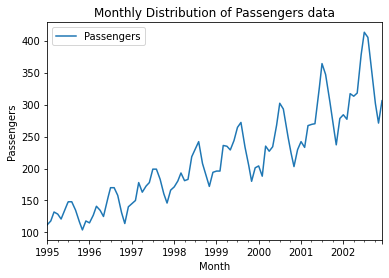

In [79]:
 interpolated = upsampled.interpolate(method='linear')
 print(interpolated.head(10))
 interpolated.plot()
 plt.ylabel("Passengers")
 plt.title("Monthly Distribution of Passengers data")

# Square root transfermation

In [80]:
from numpy import sqrt

In [81]:
airline=pd.DataFrame(data.values)
airline.columns=['passengers']
airline['passengers']=sqrt(airline['passengers'])

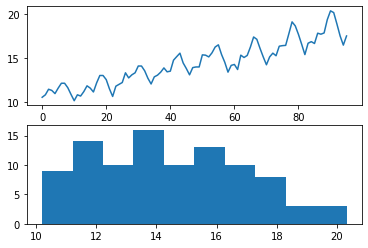

In [82]:
#line plot
plt.subplot(211)
plt.plot(airline['passengers'])
#histogram
plt.subplot(212)
plt.hist(airline['passengers'])
plt.show()      

Log Transformation

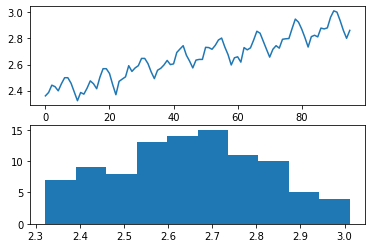

In [83]:
from numpy import log
airline['passengers']=log(airline['passengers'])
#line plot
plt.subplot(211)
plt.plot(airline['passengers'])
#histogram
plt.subplot(212)
plt.hist(airline['passengers'])
plt.show() 

simple moving Average

In [84]:
airline['6-month-SMA']=airline['passengers'].rolling(window=6).mean()
airline['12-month-SMA']=airline['passengers'].rolling(window=12).mean()


In [85]:
airline.head(16)

,passengers,6-month-SMA,12-month-SMA
0,2.359249,NaN,NaN
1,2.385342,NaN,NaN
2,2.441401,NaN,NaN
3,2.429906,NaN,NaN
4,2.397895,NaN,NaN
5,2.452637,2.411072,NaN
6,2.498606,2.434298,NaN
7,2.498606,2.453175,NaN
8,2.456327,2.455663,NaN
9,2.389562,2.448939,NaN


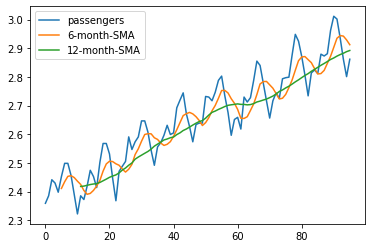

In [86]:
airline.plot()

# Exponantial Weighted moving average
Simple Exponantial Smoothing


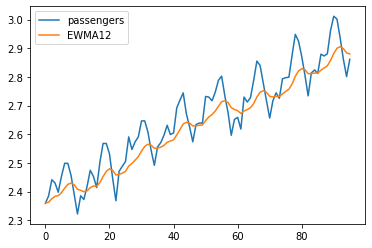

In [87]:
airline['EWMA12']=airline['passengers'].ewm(span=12,adjust=False).mean()
airline[['passengers','EWMA12']].plot()

## Comparing SMA to EWMA

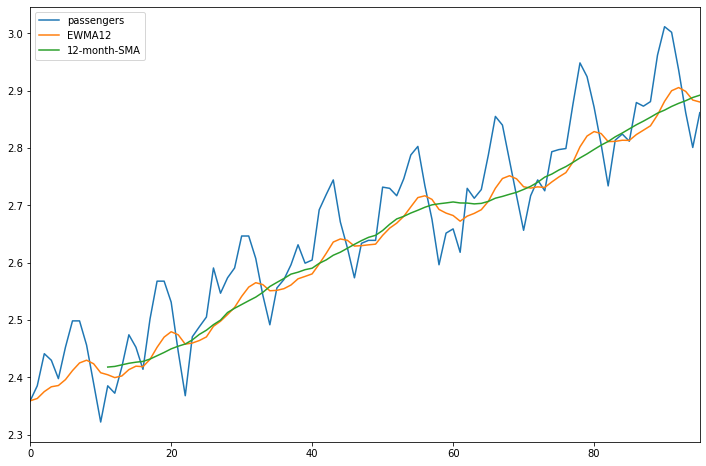

In [88]:
airline[['passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

Train Test Split

In [89]:
train_data=data.iloc[0:83]
test_data=data.iloc[83:]
train_data.shape
test_data.shape

(13, 1)

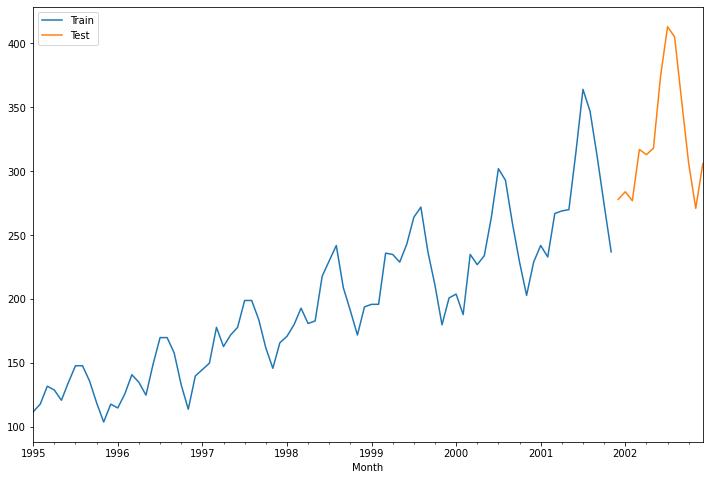

In [90]:
train_data['Passengers'].plot(legend=True,label='Train')
test_data['Passengers'].plot(legend=True,label='Test',figsize=(12,8));

Fitting the model

In [91]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model= ExponentialSmoothing(train_data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)
fitted_model=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


## Evaluating Model Against Test Set

In [92]:
test_prediction=fitted_model.forecast(13)

In [93]:
test_prediction

2001-12-01    271.124052
2002-01-01    278.217654
2002-02-01    276.787469
2002-03-01    322.239422
2002-04-01    313.626247
2002-05-01    313.610525
2002-06-01    353.214654
2002-07-01    395.944851
2002-08-01    392.581029
2002-09-01    350.209029
2002-10-01    309.394434
2002-11-01    270.900198
2002-12-01    308.378658
Freq: MS, dtype: float64

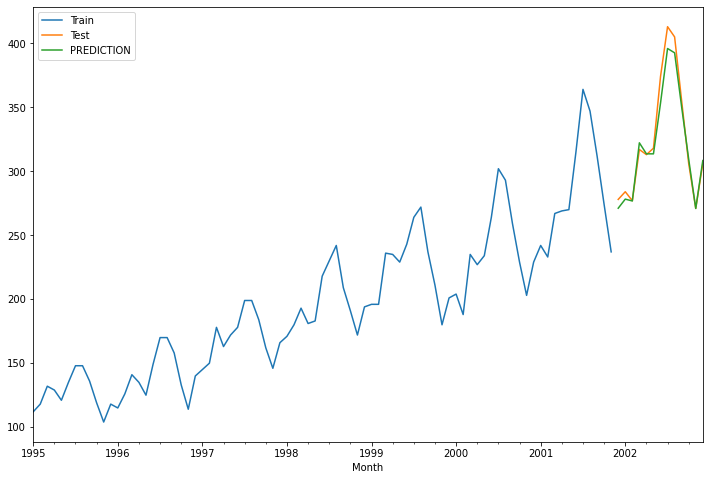

In [94]:
train_data['Passengers'].plot(legend=True,label='Train')
test_data['Passengers'].plot(legend=True,label='Test',figsize=(12,8))
test_prediction.plot(legend=True,label='PREDICTION')

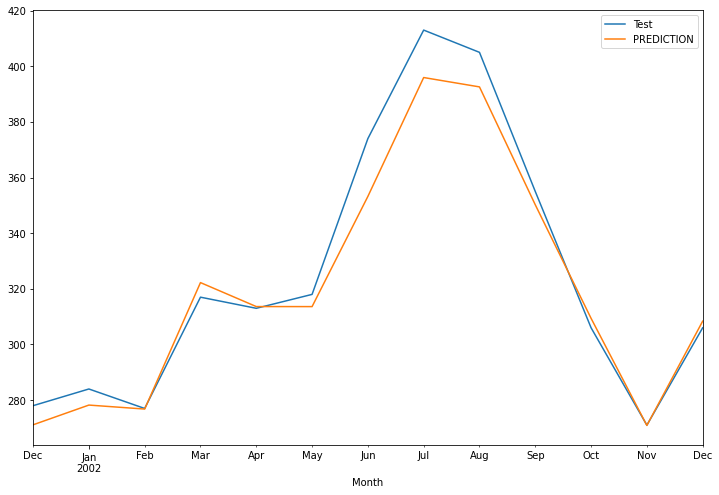

In [95]:
test_data['Passengers'].plot(legend=True,label='Test',figsize=(12,8))
test_prediction.plot(legend=True,label='PREDICTION')

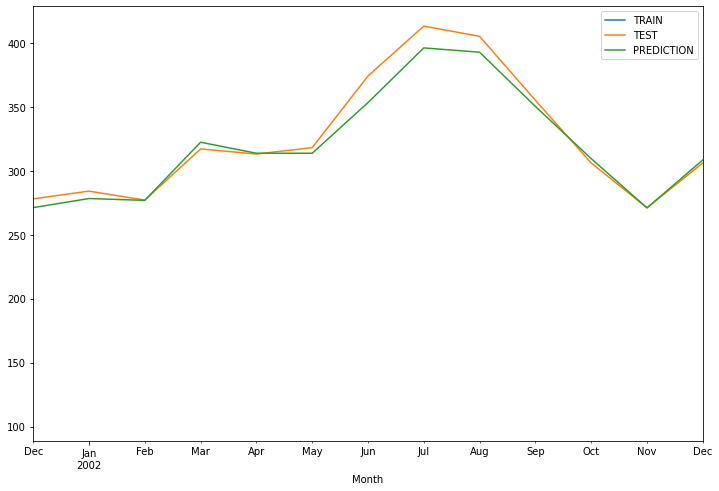

In [96]:
train_data['Passengers'].plot(legend=True,label='TRAIN')
test_data['Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_prediction.plot(legend=True,label='PREDICTION',xlim=['2001-12-01','2002-12-01']);

## Evaluation Metrics

In [97]:
from sklearn.metrics import mean_squared_error

In [98]:
mean_squared_error(test_data,test_prediction)

80.39643540241505

In [99]:
np.sqrt(mean_squared_error(test_data,test_prediction))

8.966405935625213

In [100]:
test_data.describe()

,Passengers
count,13.000000
mean,324.384615
std,47.896657
min,271.000000
25%,284.000000
50%,313.000000
75%,355.000000
max,413.000000


## Forecasting into Future

In [101]:
final_model=ExponentialSmoothing(data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
forecast_prediction= final_model.forecast(36)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


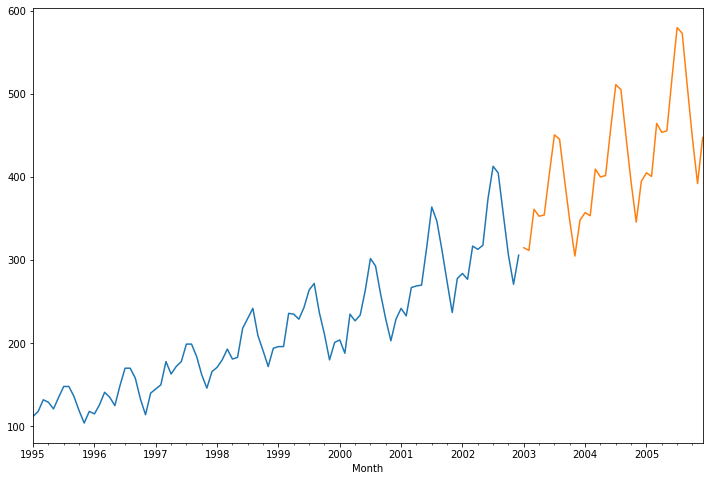

In [102]:
data['Passengers'].plot(figsize=(12,8))
forecast_prediction.plot()

## Simple Exponential Smoothing

In [103]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span=12
alpha=2/(span+1)

data['EWMA12']=data['Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [104]:
model_ses12=SimpleExpSmoothing(data['Passengers'])
fittted_model=model_ses12.fit(smoothing_level=alpha,optimized=False)
data['SES12']= fitted_model.fittedvalues.shift(-1)
data

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,Passengers,EWMA12,SES12
Month,,,
1995-01-01,112,112.000000,111.932067
1995-02-01,118,112.923077,134.952352
1995-03-01,132,115.857988,129.458014
1995-04-01,129,117.879836,129.150731
1995-05-01,121,118.359861,139.431305
...,...,...,...
2002-08-01,405,335.501047,NaN
2002-09-01,355,338.500886,NaN
2002-10-01,306,333.500749,NaN


# Double Exponential Smoothing

In [105]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

mod_add12 = ExponentialSmoothing(data['Passengers'], trend='add')
fitted_model= mod_add12.fit()
data['DESadd12'] = fitted_model.fittedvalues.shift(-1)
data

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,Passengers,EWMA12,SES12,DESadd12
Month,,,,
1995-01-01,112,112.000000,111.932067,114.042139
1995-02-01,118,112.923077,134.952352,120.042139
1995-03-01,132,115.857988,129.458014,134.042139
1995-04-01,129,117.879836,129.150731,131.042139
1995-05-01,121,118.359861,139.431305,123.042139
...,...,...,...,...
2002-08-01,405,335.501047,NaN,407.042139
2002-09-01,355,338.500886,NaN,357.042139
2002-10-01,306,333.500749,NaN,308.042139


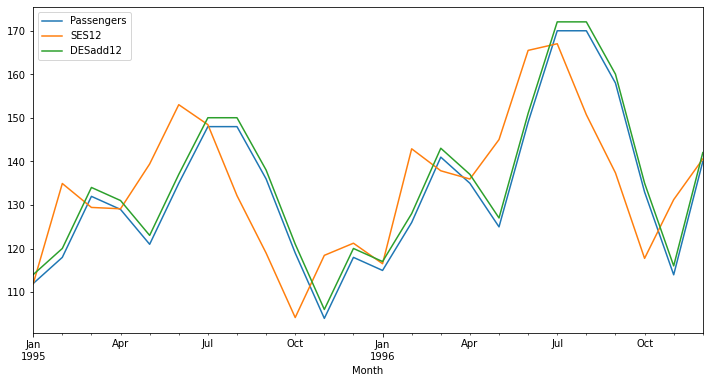

In [106]:
data[['Passengers','SES12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [107]:
data['DESmul12'] = ExponentialSmoothing(data['Passengers'], trend='mul').fit().fittedvalues.shift(-1)
data.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,Passengers,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,
1995-01-01,112,112.000000,111.932067,114.042139,112.343358
1995-02-01,118,112.923077,134.952352,120.042139,118.361752
1995-03-01,132,115.857988,129.458014,134.042139,132.404672
1995-04-01,129,117.879836,129.150731,131.042139,129.395475
1995-05-01,121,118.359861,139.431305,123.042139,121.370949


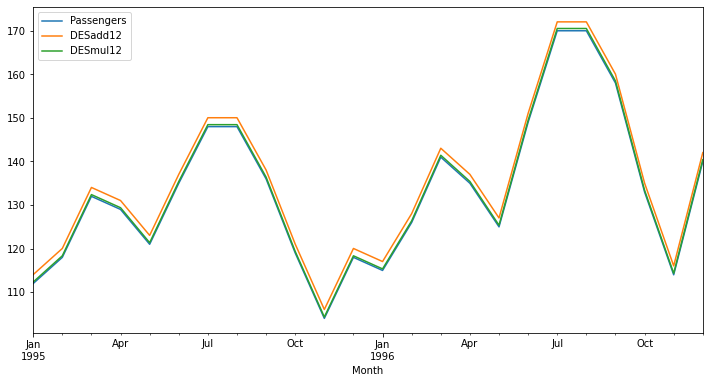

In [108]:
data[['Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

## Triple Exponential Smoothing

In [109]:
data['TESadd12'] = ExponentialSmoothing(data['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
data.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,
1995-01-01,112,112.000000,111.932067,114.042139,112.343358,113.112577
1995-02-01,118,112.923077,134.952352,120.042139,118.361752,120.484251
1995-03-01,132,115.857988,129.458014,134.042139,132.404672,135.402340
1995-04-01,129,117.879836,129.150731,131.042139,129.395475,132.997237
1995-05-01,121,118.359861,139.431305,123.042139,121.370949,125.458910


In [110]:
data['TESmul12'] = ExponentialSmoothing(data['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
data.head()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


,Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
1995-01-01,112,112.000000,111.932067,114.042139,112.343358,113.112577,113.643175
1995-02-01,118,112.923077,134.952352,120.042139,118.361752,120.484251,111.326673
1995-03-01,132,115.857988,129.458014,134.042139,132.404672,135.402340,134.355762
1995-04-01,129,117.879836,129.150731,131.042139,129.395475,132.997237,129.668669
1995-05-01,121,118.359861,139.431305,123.042139,121.370949,125.458910,129.739509


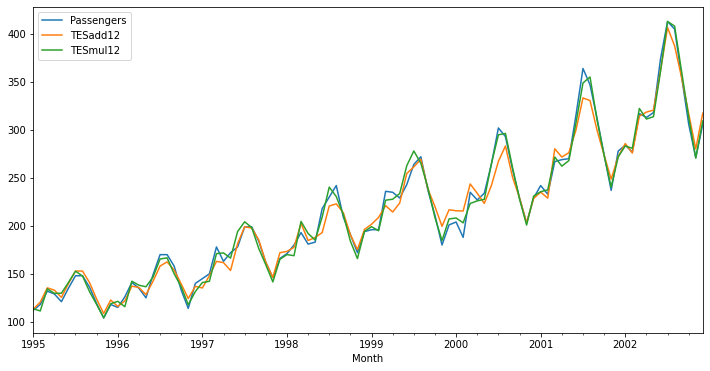

In [111]:
data[['Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

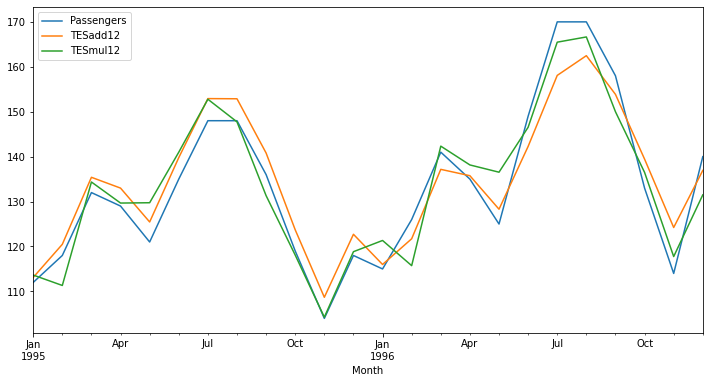

In [112]:
data[['Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [113]:
from statsmodels.tsa.ar_model import AR,ARResults
# Load the data
ar_models= AR(train_data['Passengers'])
ARfit=ar_models.fit(method='mle',ic='aic')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in arctanh
  invarcoefs = 2*np.arctanh(params)
/usr/local/lib/python3.7/dist-packages/numpy/linalg/linalg.py:2099: RuntimeWarning: invalid value encountered in slogdet
  sign, logdet = _umath_linalg.slogdet(a, signature=signature)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: Converg

In [114]:
ARfit.params

const            2.845682
L1.Passengers    1.179807
L2.Passengers   -0.434334
L3.Passengers    0.174025
L4.Passengers   -0.289226
L5.Passengers    0.304465
L6.Passengers   -0.078443
L7.Passengers    0.066186
L8.Passengers   -0.361887
L9.Passengers    0.425179
dtype: float64

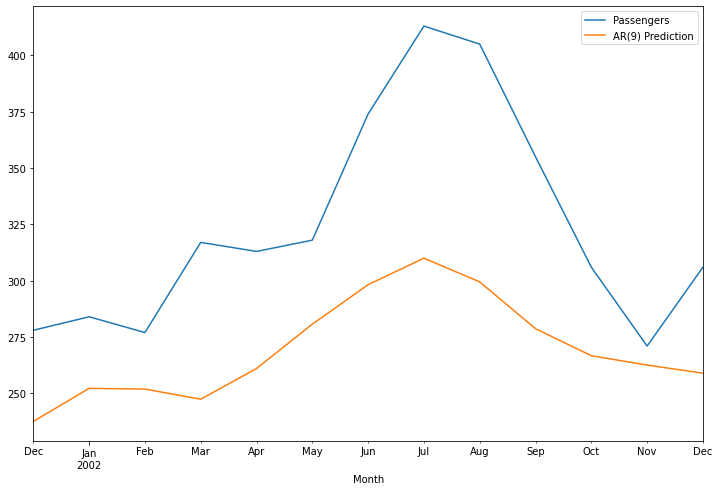

In [116]:
start=len(train_data)
end=len(data)-1
#predict test data
prediction9=ARfit.predict(start=start,end=end).rename('AR(9) Prediction')

#plot the test data and prediction data
test_data['Passengers'].plot(legend=True)
prediction9.plot(legend=True,figsize=(12,8))  

In [117]:
# ARIMA :
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data.Passengers, order=(1,1,1))
model_fit = model.fit(disp=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [118]:
# Summary of model :
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                   95
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -427.813
Method:                       css-mle   S.D. of innovations             21.536
Date:                Fri, 21 May 2021   AIC                            863.627
Time:                        07:55:43   BIC                            873.842
Sample:                    02-01-1995   HQIC                           867.755
                         - 12-01-2002                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.2914      0.266      8.601      0.000       1.769       2.814
ar.L1.D.Passengers     0.7248      0.073      9.898      0.000       0.581       0.868
ma.L1.D.Passengers    -1.0000      0.028    -36.363      0.000      -1.054      -0.946
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3797           +0.0000j            1.3797            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [119]:
# Get Root-Mean-Squared-Error for ARIMA model :
import numpy as np
residual = pd.DataFrame(model_fit.resid)
rmse = np.mean(((residual)**2)**0.5)
rmse

0    16.950775
dtype: float64

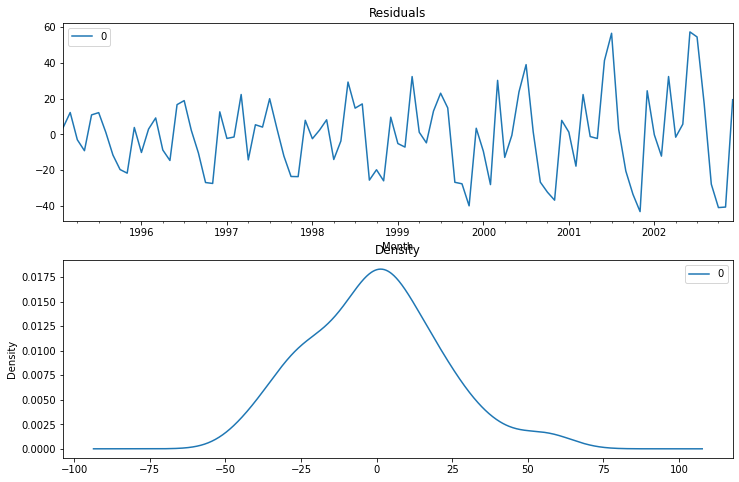

In [120]:
# Residual plot & Density of Residuals :
fig, ax = plt.subplots(2,1, figsize=(12,8))
residual.plot(title="Residuals", ax=ax[0])
residual.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

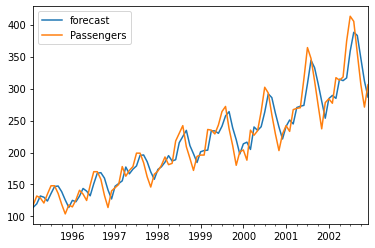

In [121]:

# prediction :
model_fit.plot_predict()
plt.show()

In [122]:
# split data :
train = data.Passengers[0:83]
test = data.Passengers[83:]

In [123]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [124]:
# forecast sales value :
forecast, se, conf = fitted.forecast(13, alpha=0.05)

In [125]:
# make series to form graph :
fc_series = pd.Series(forecast, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

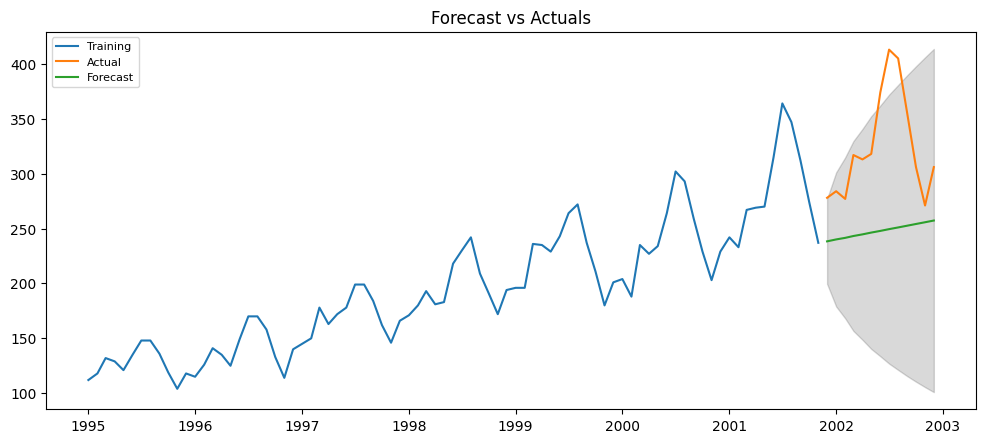

In [126]:
# Plot forecasting vs actual graph :
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)

In [127]:
# get rmse and acf value for testing :
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # Root mean squared error
    acf1 = acf(forecast-test)                     # Auto correlation function
    return({ 'rmse':rmse, 'acf1':acf1 
            })

forecast_accuracy(forecast, test.values)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'acf1': array([ 1.        ,  0.69551122,  0.16926261, -0.26823076, -0.43325448,
        -0.41369404, -0.33774947, -0.23381451, -0.08797926,  0.09368183,
         0.15541525,  0.12149119,  0.03936041]), 'rmse': 88.64103380144816}

In [128]:

# SARIMA model :
import statsmodels.api as sm
mod = sm.tsa.SARIMAX(data["Passengers"], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                         Passengers   No. Observations:                   96
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -307.047
Date:                            Fri, 21 May 2021   AIC                            620.094
Time:                                    07:55:45   BIC                            627.350
Sample:                                01-01-1995   HQIC                           623.009
                                     - 12-01-2002                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.1455      0.446     -0.327      0.744      -1.019       0.728
ma.S.L12      -0.1252      0.484   

In [129]:

sarima_rmse = np.mean(((results.resid)**2)**0.5)
sarima_rmse

9.536128137806239

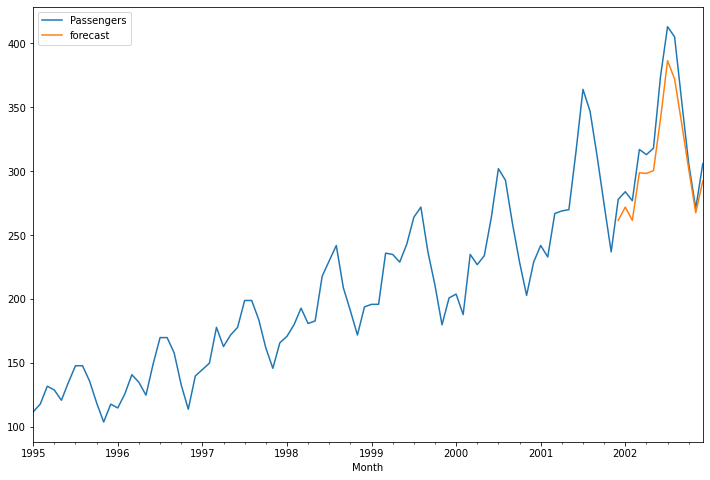

In [130]:
data['forecast'] = results.predict(start = 83, end=96 , dynamic= True)  
data[['Passengers', 'forecast']].plot(figsize=(12, 8))
plt.show()

In [131]:

# Therefor, after calculating rmse for different models we can conclude that SARIMA model performing on whole
# Passengers value gives us lesser rmse is good model compare to model with ARIMA model with -1 dispersion and applying on training data.
# ans rmse from ARIMA model with 0 dispersion on whole Passengers data gives higher rmse compare to SARIMA.

# Therefor, SARIMA model is good compare to others.